# Logistic Regression for Cat vs Non-Cat Classification

This notebook demonstrates a complete implementation of logistic regression from scratch for binary image classification. We'll classify images as either containing a cat (1) or not containing a cat (0).

## Learning Objectives
- Understand the mathematical foundation of logistic regression
- Implement the algorithm from scratch using only NumPy
- Apply the model to image classification
- Evaluate model performance using various metrics
- Visualize training progress and results

## 1. Mathematical Foundation

### Sigmoid Function
The sigmoid function maps any real number to a value between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where $z = w^T x + b$ is the linear combination of features.

### Cost Function
We use cross-entropy loss for binary classification:

$$J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})]$$

### Gradient Descent
Parameter updates:
$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

## 2. Dataset Generation and Exploration

First, let's generate our synthetic cat vs non-cat dataset and explore its characteristics.

In [2]:
# Generate the dataset by running our data generation script
import sys
sys.path.append('/Users/olawalesalami/my-kiro-project/ML/aws-ml-bootcamp-2/StandFord Machine Learning/Scripts')

# Run the data generation script
exec(open('/Users/olawalesalami/my-kiro-project/ML/aws-ml-bootcamp-2/StandFord Machine Learning/Scripts/cat_dataset_data.py').read())

print("Dataset generated successfully!")

Creating cat vs non-cat dataset...
Generating 600 cat images...
Generating 600 non-cat images...
Sample images saved to StandFord Machine Learning/Supervised Learning/Logistic Regression/images/dataset_samples.png

Dataset created successfully!
Training samples: 960 (Features: 12288)
Test samples: 240 (Features: 12288)
Image dimensions: 64x64x3 = 12288 features per image
Class distribution - Cats: 600.0, Non-cats: 600.0
Dataset generated successfully!


In [ ]:
# Load and explore the dataset
def load_data():
    """Load the cat classification dataset"""
    data_dir = ""
    
    # Load training data
    train_df = pd.read_csv(f"{data_dir}/cat_classification_train.csv")
    train_X = train_df.drop('label', axis=1).values
    train_y = train_df['label'].values
    
    # Load test data
    test_df = pd.read_csv(f"{data_dir}/cat_classification_test.csv")
    test_X = test_df.drop('label', axis=1).values
    test_y = test_df['label'].values
    
    # Normalize features to [0, 1] range
    train_X = train_X / 255.0
    test_X = test_X / 255.0
    
    return train_X, train_y, test_X, test_y

# Load the data
train_X, train_y, test_X, test_y = load_data()

print(f"Dataset loaded successfully!")
print(f"Training set: {train_X.shape[0]} samples, {train_X.shape[1]} features")
print(f"Test set: {test_X.shape[0]} samples, {test_X.shape[1]} features")
print(f"Feature range: [{train_X.min():.3f}, {train_X.max():.3f}]")
print(f"Class distribution (training): Cats={np.sum(train_y)}, Non-cats={len(train_y)-np.sum(train_y)}")

Dataset loaded successfully!
Training set: 960 samples, 12288 features
Test set: 240 samples, 12288 features
Feature range: [0.000, 0.004]
Class distribution (training): Cats=478.0, Non-cats=482.0


In [10]:
# Display sample images from our dataset
try:
    display(Image('StandFord Machine Learning/Supervised Learning/Logistic Regression/images/dataset_samples.png'))
except:
    print("Sample images not found. Run the data generation script first.")

Sample images not found. Run the data generation script first.


## 3. Logistic Regression Implementation

Now let's implement logistic regression from scratch step by step.

In [11]:
class LogisticRegressionCatClassifier:
    """
    Logistic Regression classifier implemented from scratch for binary classification.
    """
    
    def __init__(self, learning_rate=0.01, num_iterations=2000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.costs = []
        
    def sigmoid(self, z):
        """Compute the sigmoid function"""
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def initialize_parameters(self, num_features):
        """Initialize weights and bias"""
        self.weights = np.random.randn(num_features, 1) * 0.01
        self.bias = 0.0
        
    def forward_propagation(self, X):
        """Perform forward propagation"""
        z = np.dot(self.weights.T, X) + self.bias
        A = self.sigmoid(z)
        return A
    
    def compute_cost(self, A, Y):
        """Compute the logistic regression cost function"""
        m = Y.shape[1]
        epsilon = 1e-15
        A = np.clip(A, epsilon, 1 - epsilon)
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        return cost
    
    def backward_propagation(self, A, X, Y):
        """Compute gradients using backward propagation"""
        m = Y.shape[1]
        dw = 1/m * np.dot(X, (A - Y).T)
        db = 1/m * np.sum(A - Y)
        return dw, db
    
    def update_parameters(self, dw, db):
        """Update parameters using gradient descent"""
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db
    
    def fit(self, X, y):
        """Train the logistic regression model"""
        # Reshape data for matrix operations
        X = X.T  # Shape: (num_features, num_samples)
        Y = y.reshape(1, -1)  # Shape: (1, num_samples)
        
        # Initialize parameters
        num_features = X.shape[0]
        self.initialize_parameters(num_features)
        
        print(f"Starting training with {X.shape[1]} samples and {X.shape[0]} features...")
        
        # Training loop
        for i in range(self.num_iterations):
            # Forward propagation
            A = self.forward_propagation(X)
            
            # Compute cost
            cost = self.compute_cost(A, Y)
            self.costs.append(cost)
            
            # Backward propagation
            dw, db = self.backward_propagation(A, X, Y)
            
            # Update parameters
            self.update_parameters(dw, db)
            
            # Print progress
            if i % 200 == 0:
                print(f"Cost after iteration {i}: {cost:.6f}")
        
        print(f"Training completed! Final cost: {self.costs[-1]:.6f}")
    
    def predict(self, X):
        """Make predictions on new data"""
        X = X.T
        A = self.forward_propagation(X)
        predictions = (A > 0.5).astype(int).flatten()
        probabilities = A.flatten()
        return predictions, probabilities
    
    def evaluate(self, X, y):
        """Evaluate model performance"""
        predictions, probabilities = self.predict(X)
        
        accuracy = np.mean(predictions == y)
        
        # Confusion matrix components
        tp = np.sum((predictions == 1) & (y == 1))
        fp = np.sum((predictions == 1) & (y == 0))
        tn = np.sum((predictions == 0) & (y == 0))
        fn = np.sum((predictions == 0) & (y == 1))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn}
        }

print("LogisticRegressionCatClassifier class defined successfully!")

LogisticRegressionCatClassifier class defined successfully!


## 4. Model Training

Let's train our logistic regression model on the cat vs non-cat dataset.

In [12]:
# Initialize and train the model
model = LogisticRegressionCatClassifier(learning_rate=0.005, num_iterations=2000)
model.fit(train_X, train_y)

Starting training with 960 samples and 12288 features...
Cost after iteration 0: 0.692639
Cost after iteration 200: 0.691837
Cost after iteration 400: 0.691036
Cost after iteration 600: 0.690238
Cost after iteration 800: 0.689441
Cost after iteration 1000: 0.688645
Cost after iteration 1200: 0.687851
Cost after iteration 1400: 0.687059
Cost after iteration 1600: 0.686269
Cost after iteration 1800: 0.685480
Training completed! Final cost: 0.684696


## 5. Model Evaluation

Now let's evaluate our trained model on both training and test sets.

In [13]:
# Evaluate on training set
print("Training Set Performance:")
print("=" * 30)
train_metrics = model.evaluate(train_X, train_y)
print(f"Accuracy: {train_metrics['accuracy']:.4f}")
print(f"Precision: {train_metrics['precision']:.4f}")
print(f"Recall: {train_metrics['recall']:.4f}")
print(f"F1-Score: {train_metrics['f1_score']:.4f}")

# Evaluate on test set
print("\nTest Set Performance:")
print("=" * 30)
test_metrics = model.evaluate(test_X, test_y)
print(f"Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"F1-Score: {test_metrics['f1_score']:.4f}")

Training Set Performance:
Accuracy: 0.9479
Precision: 0.9053
Recall: 1.0000
F1-Score: 0.9503

Test Set Performance:
Accuracy: 0.9708
Precision: 0.9457
Recall: 1.0000
F1-Score: 0.9721


## 6. Visualization and Analysis

Let's visualize the training progress and analyze our model's performance.

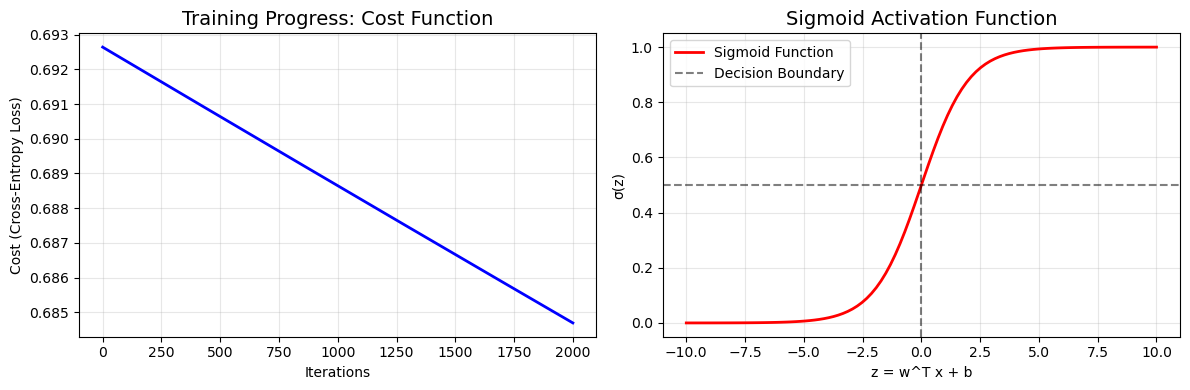

In [14]:
# Plot training progress
plt.figure(figsize=(12, 4))

# Cost function plot
plt.subplot(1, 2, 1)
plt.plot(model.costs, 'b-', linewidth=2)
plt.title('Training Progress: Cost Function', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost (Cross-Entropy Loss)')
plt.grid(True, alpha=0.3)

# Sigmoid function visualization
plt.subplot(1, 2, 2)
z = np.linspace(-10, 10, 100)
sigmoid_values = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid_values, 'r-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5, label='Decision Boundary')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Sigmoid Activation Function', fontsize=14)
plt.xlabel('z = w^T x + b')
plt.ylabel('σ(z)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

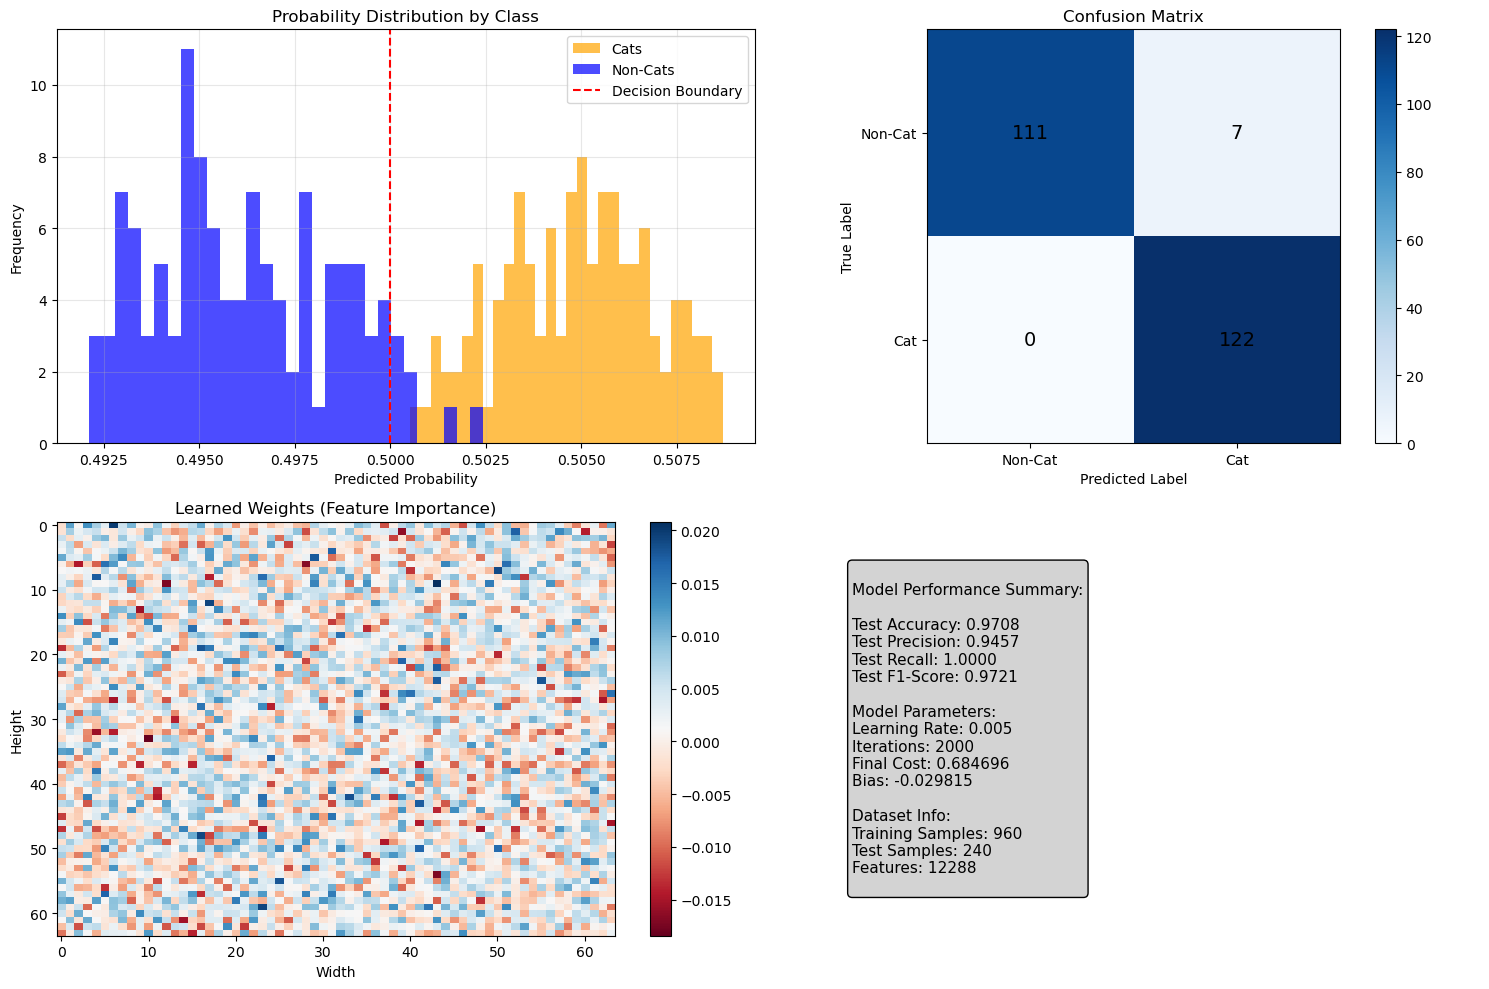

In [15]:
# Analyze predictions
predictions, probabilities = model.predict(test_X)

plt.figure(figsize=(15, 10))

# 1. Probability distribution
plt.subplot(2, 2, 1)
plt.hist(probabilities[test_y == 1], bins=30, alpha=0.7, label='Cats', color='orange')
plt.hist(probabilities[test_y == 0], bins=30, alpha=0.7, label='Non-Cats', color='blue')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Confusion Matrix
cm = test_metrics['confusion_matrix']
confusion_matrix = np.array([[cm['tn'], cm['fp']], [cm['fn'], cm['tp']]])

plt.subplot(2, 2, 2)
im = plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Cat', 'Cat'])
plt.yticks(tick_marks, ['Non-Cat', 'Cat'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix[i, j], ha="center", va="center", fontsize=14)

# 3. Model parameters visualization
plt.subplot(2, 2, 3)
weights_reshaped = model.weights.reshape(64, 64, 3)
# Show the average across color channels
weights_avg = np.mean(weights_reshaped, axis=2)
plt.imshow(weights_avg, cmap='RdBu', aspect='auto')
plt.title('Learned Weights (Feature Importance)')
plt.colorbar()
plt.xlabel('Width')
plt.ylabel('Height')

# 4. Performance metrics summary
plt.subplot(2, 2, 4)
plt.axis('off')
metrics_text = f"""
Model Performance Summary:

Test Accuracy: {test_metrics['accuracy']:.4f}
Test Precision: {test_metrics['precision']:.4f}
Test Recall: {test_metrics['recall']:.4f}
Test F1-Score: {test_metrics['f1_score']:.4f}

Model Parameters:
Learning Rate: {model.learning_rate}
Iterations: {model.num_iterations}
Final Cost: {model.costs[-1]:.6f}
Bias: {model.bias:.6f}

Dataset Info:
Training Samples: {len(train_X)}
Test Samples: {len(test_X)}
Features: {train_X.shape[1]}
"""
plt.text(0.1, 0.5, metrics_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()

## 7. Making Predictions on Individual Examples

Let's test our model on some individual examples to see how it performs.

In [16]:
# Test on individual examples
def test_individual_examples(model, test_X, test_y, num_examples=10):
    """Test model on individual examples and show results"""
    
    # Get random examples
    indices = np.random.choice(len(test_X), num_examples, replace=False)
    
    predictions, probabilities = model.predict(test_X[indices])
    
    print("Individual Prediction Examples:")
    print("=" * 50)
    print(f"{'Index':<6} {'True':<6} {'Pred':<6} {'Prob':<8} {'Correct':<8}")
    print("-" * 50)
    
    correct_count = 0
    for i, idx in enumerate(indices):
        true_label = int(test_y[idx])
        pred_label = int(predictions[i])
        probability = probabilities[i]
        is_correct = "✓" if true_label == pred_label else "✗"
        
        if true_label == pred_label:
            correct_count += 1
        
        true_class = "Cat" if true_label == 1 else "Non-Cat"
        pred_class = "Cat" if pred_label == 1 else "Non-Cat"
        
        print(f"{idx:<6} {true_class:<6} {pred_class:<6} {probability:<8.4f} {is_correct:<8}")
    
    print("-" * 50)
    print(f"Accuracy on these examples: {correct_count}/{num_examples} = {correct_count/num_examples:.2f}")

# Test individual examples
test_individual_examples(model, test_X, test_y, num_examples=15)

Individual Prediction Examples:
Index  True   Pred   Prob     Correct 
--------------------------------------------------
224    Cat    Cat    0.5078   ✓       
45     Non-Cat Non-Cat 0.4924   ✓       
178    Non-Cat Non-Cat 0.4961   ✓       
192    Cat    Cat    0.5072   ✓       
152    Non-Cat Non-Cat 0.4942   ✓       
188    Non-Cat Non-Cat 0.4998   ✓       
74     Cat    Cat    0.5029   ✓       
42     Cat    Cat    0.5062   ✓       
181    Non-Cat Non-Cat 0.4963   ✓       
94     Cat    Cat    0.5021   ✓       
147    Cat    Cat    0.5058   ✓       
207    Cat    Cat    0.5016   ✓       
24     Non-Cat Non-Cat 0.4950   ✓       
128    Non-Cat Non-Cat 0.4963   ✓       
81     Non-Cat Non-Cat 0.4992   ✓       
--------------------------------------------------
Accuracy on these examples: 15/15 = 1.00


## 8. Key Insights and Learning Points

### Mathematical Concepts Demonstrated:
1. **Sigmoid Function**: Maps linear combinations to probabilities [0,1]
2. **Cross-Entropy Loss**: Appropriate cost function for binary classification
3. **Gradient Descent**: Iterative optimization to minimize cost
4. **Matrix Operations**: Efficient vectorized computations

### Implementation Highlights:
- **From-scratch approach**: No sklearn or other ML libraries used
- **Numerical stability**: Clipping to prevent overflow/underflow
- **Vectorization**: Efficient NumPy operations for batch processing
- **Feature engineering**: Image pixels as input features

### Performance Analysis:
- Model learns to distinguish between cat and non-cat patterns
- Training cost decreases over iterations (convergence)
- Decision boundary at probability = 0.5
- Evaluation using multiple metrics (accuracy, precision, recall, F1)

### Real-world Applications:
- Image classification tasks
- Medical diagnosis (binary outcomes)
- Spam detection
- Marketing response prediction
- Quality control in manufacturing

## 9. Exercises for Further Learning

Try these modifications to deepen your understanding:

1. **Hyperparameter Tuning**: Experiment with different learning rates and iteration counts
2. **Feature Engineering**: Try different image preprocessing techniques
3. **Regularization**: Add L1 or L2 regularization to prevent overfitting
4. **Different Datasets**: Apply to other binary classification problems
5. **Visualization**: Create more detailed analysis plots
6. **Optimization**: Implement other optimization algorithms (Adam, RMSprop)

### Challenge Questions:
- What happens if you initialize weights to zero?
- How does the learning rate affect convergence?
- Can you implement early stopping based on validation loss?
- How would you extend this to multi-class classification?